# 机器学习数据预处理基础

# 1. One-Hot编码

## 任务介绍
- 使用Pandas中的value_counts()函数，查看data中的特征User continent的取值类型， 并打印输出的内容；
- 使用pandas中的get_dummies()函数对data中的特征User continent进行One-Hot编码，参数prefix为User continent_；
- 将编码后的结果保存在encode_uc中，并输出变量的前5行内容。

## 预期实验结果

![](https://ai-studio-static-online.cdn.bcebos.com/bac5b83fc21a435fabddd64a5ab463600c7d80dc00e44fd6ae1715ae25355db6)
![](https://ai-studio-static-online.cdn.bcebos.com/2f183364e29348079537f8ad38d9489004d4498e9b5d483fa9432f2bae06654e)



> 补全代码;

In [16]:
import pandas as pd 
data = pd.read_csv('user_review.csv')
# 请在下方作答 #
continent_counts = data['User continent'].value_counts().rename_axis(None)
continent_counts.name = 'User continent'
print(continent_counts)

# # 创建交叉表
# cross_table = pd.crosstab(index=data.index, columns=data['User continent'], margins=False, rownames=[""])
# 
# cross_table.head().to_csv('result.csv')

# 对特征 "User Continent" 进行 One-Hot 编码
encode_uc = pd.get_dummies(data['User continent'], prefix='User continent').astype(int)

# 输出编码后的结果的前5行内容
# encode_uc.head().to_csv('result.csv')
encode_uc.head()

North America    296
Europe           118
Oceania           41
Asia              36
Africa             7
South America      6
Name: User continent, dtype: int64


,User continent_Africa,User continent_Asia,User continent_Europe,User continent_North America,User continent_Oceania,User continent_South America
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,1,0,0,0
4,0,0,0,1,0,0


# 2. 缺失值填补

## 任务介绍
- 使用pandas中的value_counts()函数打印输出data中的特征Traveler type的取值统计信息， 并查看其是否含有缺失值；
- 如果存在缺失值，将特征Traveler type在其他样本中取值频数最多的值保存在变量freq_v中，并使用freq_v进行缺失值填充；
- 再次打印输出特征Traveler type的取值统计信息。

## 预期实验结果
![](https://ai-studio-static-online.cdn.bcebos.com/573d921570d34dc08c44f863ee8732f8d5816c88af7b467aa8cae7a2ce188129)


> 补全代码：

In [9]:
import pandas as pd 
data = pd.read_csv('user_review.csv')

# 请在下方作答 #
# print(_________)
Traveler = data['Traveler type'].value_counts(dropna=False).rename_axis(None)
Traveler.name = 'Traveler type'
print(Traveler)
# print(data['Traveler type'].value_counts(dropna=False))

# freq_v = _________
freq_v = data['Traveler type'].value_counts().idxmax()

### 缺失值填充
# data[_________] = data[_________].fillna(freq_v)
data['Traveler type'] = data['Traveler type'].fillna(freq_v)

### 打印
print('')
print(u'缺失值填充完之后：')
print( '')
# print(_________)
Traveler = data['Traveler type'].value_counts().rename_axis(None)
Traveler.name = 'Traveler type'
print(Traveler)
# print(data['Traveler type'].value_counts().rename_axis(None))

Couples     214
Families    110
Friends      82
Business     74
Solo         21
NaN           3
Name: Traveler type, dtype: int64

缺失值填充完之后：

Couples     217
Families    110
Friends      82
Business     74
Solo         21
Name: Traveler type, dtype: int64


# 3. 特征标准化

## 任务1:
- 使用sklearn中preprocessing模块下的StandardScaler()函数对data的特征Score进行Z-score标准化；
- 将特征取值的均值保存在变量score_mean中，并打印；
- 将特征取值的方差保存在变量score_var中，并打印。

## 预期实验结果
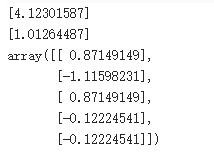


> 补全代码：

In [10]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('user_review.csv')

# 请在下方作答 #
## 创建Z-score对象
std_scaler = StandardScaler()

## Score特征标准化，使用fit_transform()方法
# normal_df = _________
normal_df = pd.DataFrame(std_scaler.fit_transform(data[['Score']]), columns=['Score'])

## 均值
# score_mean = _________
score_mean = std_scaler.mean_

## 方差
# score_var = _________
score_var = std_scaler.var_

## 打印
print (score_mean)
print (score_var)

## 打印前五行内容
normal_df[:5]

[4.12301587]
[1.01264487]


,Score
0,0.871491
1,-1.115982
2,0.871491
3,-0.122245
4,-0.122245


## 任务2：
- 自定义函数min_max()实现MinMax标准化，输入参数data为要进行标准化的数据，输出为标准化后的数据。
- 使自定义的min_max()函数对data的特征Score进行MinMax标准化，输出结果保存在score_transformed中，并打印变量的前5行内容

## 预期结果
![](https://ai-studio-static-online.cdn.bcebos.com/98a830f8c5594920883029b03ae2882f516aef4a6af244ff93061ef21aa09836)


> 补全代码：

In [11]:
import pandas as pd 
data = pd.read_csv('user_review.csv')

# 请在下方作答 #
def min_max(data):
    
    ## 最小值
    # data_min = _________
    data_min = data.min()
    ## 最大值
    # data_max = _________
    data_max = data.max()
    ## 最大值与最小值之间的差值
    # _________
    range_vals = data_max - data_min
    ## 根据MinMax标准化的定义实现
    # new_data = _________
    new_data = (data - data_min) / range_vals
    ## 返回结果
    return new_data

## 调用min_max()函数
# score_transformed = min_max(_________)
score_transformed = min_max(data[['Score']])

## 打印变量的前5行内容
score_transformed.head()

,Score
0,1.00
1,0.50
2,1.00
3,0.75
4,0.75


## 任务3：
- 自定义logistic()函数，输入参数为要进行标准化的数据，输出结果为经过标准化后的数据；
- 使用自定义函数对data的特征Member years进行Logsitic标准化，结果保存在member_transformed中，并输出变量的前5行内容。

## 预期结果：
![](https://ai-studio-static-online.cdn.bcebos.com/22fd81b1a5614b418f88cbe90bf7f99ba6c553820c2542be80f1a90421779026)


> 补全代码

In [12]:
import pandas as pd 
data = pd.read_csv('user_review.csv')

# 请在下方作答 #
def logistic(data):
    
    import numpy as np
    import warnings
    warnings.filterwarnings("ignore")
    
    ## 计算 1 + e^(-x)
    # denominator = _________
    denominator = 1 + np.exp(-data)
    
    ## 实现logistic标准化
    # new_data = _________
    new_data = 1 / denominator
    
    ## 返回结果
    return new_data

## 对特征Member years进行logsitic标准化
# _________
member_transformed = logistic(data['Member years'])

## 打印内容
member_transformed.head()

0    0.999877
1    0.952574
2    0.880797
3    0.997527
4    0.999089
Name: Member years, dtype: float64

# 4. 特征离散化

## 任务介绍
- 使用Pandas的qcut()函数对data中的特征Member years进行等频离散化，结果保存在bins中；
- 使用pd.value_counts()函数统计categorical对象bins的取值信息。

## 预期结果
![](https://ai-studio-static-online.cdn.bcebos.com/a4729a315ee6483687f3a819d01d905b025fa5f90da04f3e893a7a80ce5e5107)


> 补全代码：

In [13]:
import pandas as pd 
data = pd.read_csv('user_review.csv')

# 请在下方作答 #
import pandas as pd 

## 返回bins
# bins = _________
bins = pd.qcut(data['Member years'], q=4)

## 统计取值信息
# _________
value_counts_result = pd.value_counts(bins)
value_counts_result.name = 'Member years'
print(value_counts_result)

Member years
(-1806.001, 2.0]    156
(6.0, 13.0]         124
(2.0, 4.0]          123
(4.0, 6.0]          101
Name: Member years, dtype: int64


# 5. 离群值检测

## 任务介绍
- 使用拉依达准则对data的特征Member years进行离群值检测；
- 如果存在离群值，输出离群值的个数outlier_num，并将包含离群值的数据记录保存在变量outeliers中，并打印变量内容。

## 预期结果
![](https://ai-studio-static-online.cdn.bcebos.com/40e316267fc542339a74291e8438e340109ece96fc2a439591b75414e12085d2)


> 补全代码：

In [14]:
import pandas as pd 
import numpy as np
data = pd.read_csv('user_review.csv')
member_data = data[['Member years']]

# 请在下方作答 #
## Z-score标准化
# new_data = _________
new_data = (member_data - member_data.mean()) / member_data.std()

## 写出过滤条件
# outlier_judge = _________
outlier_judge = np.abs(new_data) > 3

## 统计离群值的个数
# outlier_num = _________
outlier_num = np.sum(outlier_judge)

## 包含离群值的数据样本记录
# outliers = _________
outliers = data[outlier_judge.any(axis=1)]

## 打印
outliers
# print(outliers)

,User country,User continent,Member years,Traveler type,Hotel name,Hotel stars,Nr. rooms,Score
75,USA,North America,-1806,Solo,Treasure Island- TI Hotel & Casino,4.0,2884,5
